In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv('survey_results_public.csv')

In [3]:
# data_set.info()

# Geography

In [4]:
countries = data_set['Country']

In [5]:
# total unique countries
len(countries.unique())  

184

In [6]:
# check for null enteries
any(countries.isnull())

True

In [7]:
# Remove null values from countries
countries = countries.dropna(how='any',axis=0) 

In [8]:
import collections
from geopy.geocoders import Nominatim  # Used to get the country coordinates (lat-long) with the help of name of country.

geolocator = Nominatim(user_agent='sameersharma123@gmail.com')  # Use user agent as your email-id

country_occurances = collections.Counter(countries)  # Get occurance of each country

total_persons = 64072  # get it from data_set.info()

# Make the following lists in order to make data frame of them later
country_names = list()  # All country names.
country_person_count = list()  # Number of persons that have done survey with respect to each country.
country_person_percentage = list()  # Percentage of persons that have done survey with respect to each country.
country_lat_long = list()  # Coordinates (Latitude, Longitude) of each country.

for country, persons in country_occurances.items():
    country_names.append(country)
    country_person_count.append(persons)
    country_person_percentage.append(round((persons/total_persons)*100, 4))
    
    try:
        location = geolocator.geocode(country)
        latitude = location.latitude
        longitude = location.longitude
        country_lat_long.append((latitude, longitude))
        
    except AttributeError:
        country_lat_long.append(np.nan)  # put np.nan if geolocator.geocode(country) was unable to find the coordiantes of that country with respect to name of country 
    except:
        country_lat_long.append(np.nan)

In [9]:
# Make data frame of above list
df = pd.DataFrame(data = list(zip(country_names, country_person_count, country_person_percentage, country_lat_long)), 
                              index=range(0, len(country_names)), 
                              columns=['Country', 'Person-Count', 'Person-Percentage', 'Latitude-Longitude'])

In [10]:
df.head()

,Country,Person-Count,Person-Percentage,Latitude-Longitude
0,Germany,3890,6.0713,"(51.0834196, 10.4234469)"
1,United Kingdom,3896,6.0807,"(54.7023545, -3.2765753)"
2,Russian Federation,1092,1.7043,"(64.6863136, 97.7453061)"
3,Albania,54,0.0843,"(41.000028, 19.9999619)"
4,United States,12469,19.4609,"(39.7837304, -100.4458825)"


In [11]:
# Check for the Latitude-Longitude of countries to check if anyone have null value
any(df['Latitude-Longitude'].isnull())  

True

In [12]:
# Get the index and name of the countries that are having null Latitude-Longitude as geopy library was unable to find the geolocation for all country names.
df[['Country', 'Latitude-Longitude']][df['Latitude-Longitude'].isnull()]

,Country,Latitude-Longitude
103,Hong Kong (S.A.R.),NaN
123,The former Yugoslav Republic of Macedonia,NaN


In [13]:
# Find the latitude-longitude of above countrys from internet and put them in the dataframe ie. df

pd.options.mode.chained_assignment = None  # Just used to remove the warnings

Hong_Kong = (22.396427, 114.109497)
The_former_Yugoslav_Republic_of_Macedonia = (27.602079, -81.529083)

df['Latitude-Longitude'][103] = Hong_Kong
df['Latitude-Longitude'][123] = The_former_Yugoslav_Republic_of_Macedonia

In [14]:
df.loc[[103, 123], :]  # view changed results

,Country,Person-Count,Person-Percentage,Latitude-Longitude
103,Hong Kong (S.A.R.),111,0.1732,"(22.396427, 114.109497)"
123,The former Yugoslav Republic of Macedonia,38,0.0593,"(27.602079, -81.529083)"


In [15]:
# Reflect the above changes in country_lat_long list also...
country_lat_long[103] = Hong_Kong
country_lat_long[123] = The_former_Yugoslav_Republic_of_Macedonia

In [16]:
# Display the results on map

import folium
map = folium.Map(tiles="OpenStreetMap", min_zoom=2)

for loc, country, count, count_per in zip(country_lat_long, country_names, country_person_count, country_person_percentage):
    if count_per > 10:  # change the radius of circle with respect to number of respondants
        rad = 25
    elif 5 < count_per < 7:
        rad = 17
    elif 2 < count_per < 4:
        rad = 12
    elif 1 < count_per < 3:
        rad = 10
    elif 1 < count_per < 2:
        rad = 8
    elif count_per < 0.01:
        rad = 1
    elif count_per < 0.1:
        rad = 3
    else:
        rad = 6
        
    folium.CircleMarker(
        location=loc,
        radius=rad,
        popup=f'{country}\n{count}\n{round(count_per, 2)}%',
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map)

map

In [17]:
# save map
map.save('Map.html')

# Developer Roles

In [18]:
dev_type = data_set['DevType']

In [19]:
# check for null enteries
any(dev_type.isnull())

True

In [20]:
# Remove null values from countries
dev_type = dev_type.dropna(how='any',axis=0) 

In [21]:
import collections

all_occ_dev_types =  [j for i in dev_type for j in i.split(';')]  #  list of all Dev-types including duplicates

developer_type_occurances = collections.Counter(all_occ_dev_types)  # Count occurances of each developer type

total_responces = len(dev_type)

# Make lists below to make dataframe
developer_type = list()  # list of all unique developer type.
developer_occurances = list()  # list of all developer type occurances
percentage_occurances = list()  # list of all developer type occurances in pecentage

for d_type, count in developer_type_occurances.items():
    per = round((count / total_responces) * 100, 2)
    
    developer_type.append(d_type)
    developer_occurances.append(count)
    percentage_occurances.append(per)

In [22]:
# Make data frame
df_dev_type = pd.DataFrame(data=list(zip(developer_type, developer_occurances, percentage_occurances)), 
                           index=range(0, len(developer_type)), columns=['Developer-Type', 'Count', 'Percentage(%)'])

In [23]:
# sort the dataframe in decending order
df_dev_type.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [24]:
df_dev_type.head()

,Developer-Type,Count,Percentage(%)
5,"Developer, back-end",27228,55.15
1,"Developer, full-stack",27125,54.94
4,"Developer, front-end",18296,37.06
0,"Developer, desktop or enterprise applications",11784,23.87
2,"Developer, mobile",9482,19.21


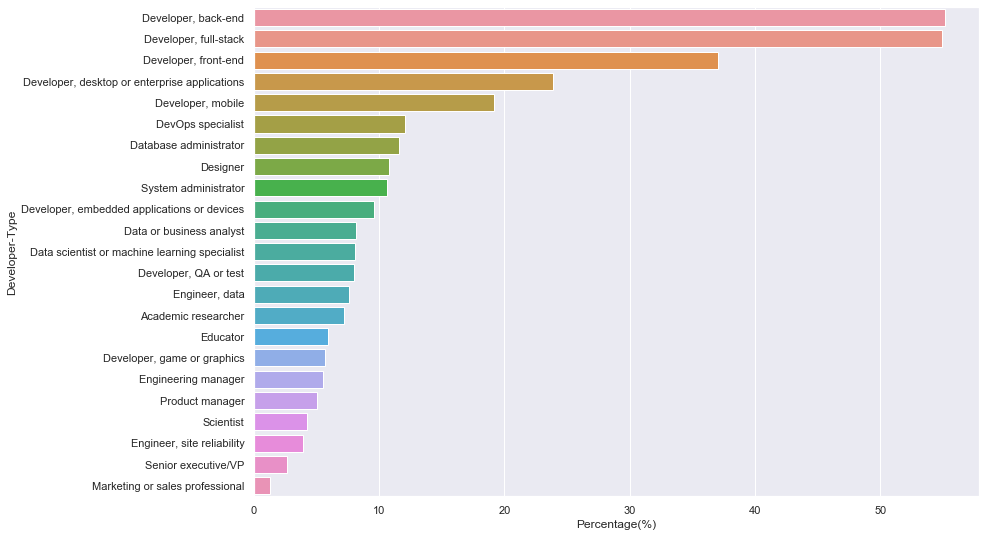

In [25]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Developer-Type', data=df_dev_type)  # plot the bars

In [26]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("DeveloperType.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Education (Undergraduate Major)

In [27]:
education = data_set['UndergradMajor']

In [28]:
# check for null enteries
any(education.isnull())

True

In [29]:
# Remove null values from countries
education = education.dropna(how='any',axis=0) 

In [30]:
import collections

education_occurances = collections.Counter(education)  # Count occurances of each developer type

total = len(education)

eduation_type = list()
education_count = list()
education_per = list()

for edu_type, edu_count in education_occurances.items():
    edu_per = round((edu_count / total) * 100, 1)
    
    eduation_type.append(edu_type)
    education_count.append(edu_count)
    education_per.append(edu_per)

In [31]:
# Make data frame
df_education_type = pd.DataFrame(data=list(zip(eduation_type, education_count, education_per)), 
                           index=range(0, len(eduation_type)), columns=['Education-Type', 'Count', 'Percentage(%)'])

In [32]:
df_education_type

,Education-Type,Count,Percentage(%)
0,"Computer science, computer engineering, or sof...",31582,61.9
1,Mathematics or statistics,1849,3.6
2,"Another engineering discipline (such as civil,...",4754,9.3
3,"A humanities discipline (such as literature, h...",1007,2.0
4,"A health science (such as nursing, pharmacy, r...",252,0.5
5,"Information systems, information technology, o...",4071,8.0
6,Web development or web design,1789,3.5
7,"A natural science (such as biology, chemistry,...",2205,4.3
8,Fine arts or performing arts (such as graphic ...,725,1.4
9,I never declared a major,453,0.9


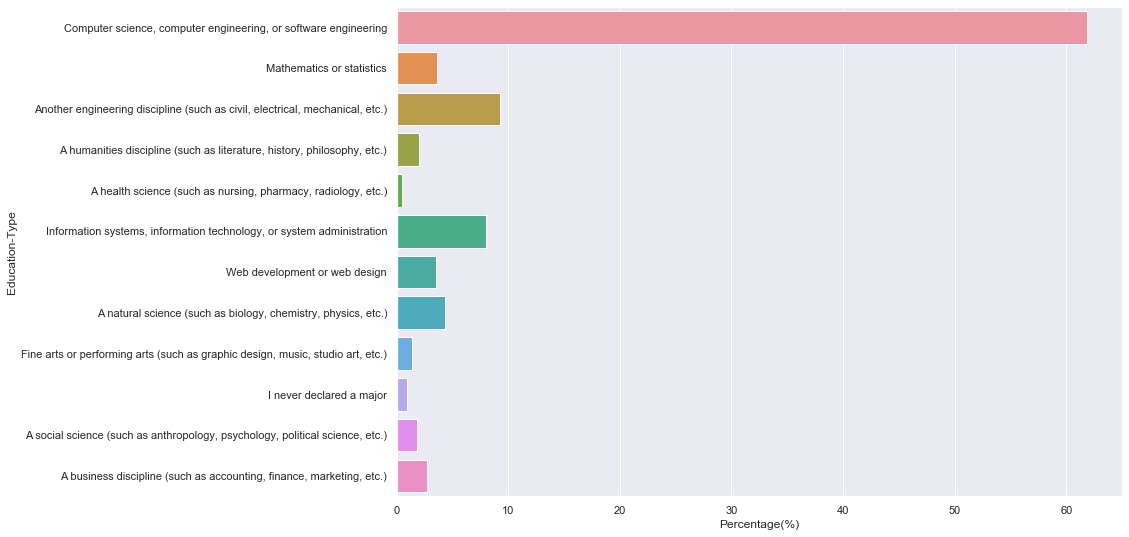

In [33]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Education-Type', data=df_education_type)  # plot the bars

In [34]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("EducationType.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Years Coding Professionally

In [35]:
coding_experience = data_set['YearsCodePro']

In [36]:
# check for null enteries
any(coding_experience.isnull())

True

In [37]:
# Remove null values from countries
coding_experience = coding_experience.dropna(how='any',axis=0) 

In [38]:
import collections
experience_correlations = collections.Counter(coding_experience)  # Count occurances of each developer type
experience_correlations.keys()  # check the type of data

dict_keys(['27', '4', '8', '13', '2', '7', '20', '1', '23', '3', '12', '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16', '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22', '30', '38', '26', '40', '33', '31', 'More than 50 years', '34', '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44', '48', '49'])

In [39]:
total = len(coding_experience)

less_than_5 = 0  # number of persons are coding professionally for less than 5 years
five_to_nine = 0
ten_to_forteen = 0
fifteen_to_nineteen = 0
twenty_to_twentyfour = 0
twentyfive_to_twetynine = 0
thirty_to_thirtyfour = 0
thirtyfive_to_thirtynine = 0
forty_to_fortyfour = 0
fortyfive_to_fortynine = 0
fifty_and_more = 0

for exper in coding_experience:
    if exper == 'Less than 1 year':
        less_than_5 += 1
    elif exper == 'More than 50 years':
        fifty_and_more += 1
    else:
        exper = int(exper)
        if exper < 5:
            less_than_5 += 1
        elif 5 <= exper <= 9:
            five_to_nine += 1
        elif 10 <= exper <= 14:
            ten_to_forteen += 1
        elif 15 <= exper <= 19:
            fifteen_to_nineteen += 1
        elif 20 <= exper <= 24:
            twenty_to_twentyfour += 1
        elif 25 <= exper <= 29:
            twentyfive_to_twetynine += 1
        elif 30 <= exper <= 34:
            thirty_to_thirtyfour += 1
        elif 35 <= exper <= 39:
            thirtyfive_to_thirtynine += 1
        elif 40 <= exper <= 44:
            forty_to_fortyfour += 1
        elif 45 <= exper <= 49:
            fortyfive_to_fortynine += 1
        elif exper >= 50:
            fifty_and_more += 1
            
per_less_than_5 = round((less_than_5 / total) * 100, 1)  # number of persons are coding professionally for less than 5 years in percentage
per_five_to_nine = round((five_to_nine / total) * 100, 1)
per_ten_to_forteen = round((ten_to_forteen / total) * 100, 1)
per_fifteen_to_nineteen = round((fifteen_to_nineteen / total) * 100, 1)
per_twenty_to_twentyfour = round((twenty_to_twentyfour / total) * 100, 1)
per_twentyfive_to_twetynine = round((twentyfive_to_twetynine / total) * 100, 1)
per_thirty_to_thirtyfour = round((thirty_to_thirtyfour / total) * 100, 1)
per_thirtyfive_to_thirtynine = round((thirtyfive_to_thirtynine / total) * 100, 1)
per_forty_to_fortyfour = round((forty_to_fortyfour / total) * 100, 1)
per_fortyfive_to_fortynine = round((fortyfive_to_fortynine / total) * 100, 1)
per_fifty_and_more = round((fifty_and_more / total) * 100, 1)

list_of_ages_count = [less_than_5, five_to_nine, ten_to_forteen, fifteen_to_nineteen, twenty_to_twentyfour, twentyfive_to_twetynine, 
       thirty_to_thirtyfour, thirtyfive_to_thirtynine, forty_to_fortyfour, fortyfive_to_fortynine, fifty_and_more]

list_of_ages_percentages = [per_less_than_5, per_five_to_nine, per_ten_to_forteen, per_fifteen_to_nineteen, per_twenty_to_twentyfour,
                           per_twentyfive_to_twetynine, per_thirty_to_thirtyfour, per_thirtyfive_to_thirtynine, per_forty_to_fortyfour, per_fortyfive_to_fortynine, per_fifty_and_more]

y_labels = ['Less than 5 years', 'Five to nine years', 'Ten to forteen years', 'Fifteen to nineteen years', 'Twenty to twentyfour years', 'Twentyfive to twetynine years', 
       'Thirty to thirtyfour years', 'Thirtyfive to thirtynine years', 'Forty to fortyfour years', 'Fortyfive to fortynine years', 'Fifty and more years']

In [40]:
# Make data frame
df_experience = pd.DataFrame(data=list(zip(y_labels, list_of_ages_count, list_of_ages_percentages)), 
                           index=range(0, len(y_labels)), columns=['Ages', 'Count', 'Percentage(%)'])

In [41]:
df_experience

,Ages,Count,Percentage(%)
0,Less than 5 years,18337,39.6
1,Five to nine years,12414,26.8
2,Ten to forteen years,6804,14.7
3,Fifteen to nineteen years,3536,7.6
4,Twenty to twentyfour years,2781,6.0
5,Twentyfive to twetynine years,1112,2.4
6,Thirty to thirtyfour years,725,1.6
7,Thirtyfive to thirtynine years,378,0.8
8,Forty to fortyfour years,177,0.4
9,Fortyfive to fortynine years,38,0.1


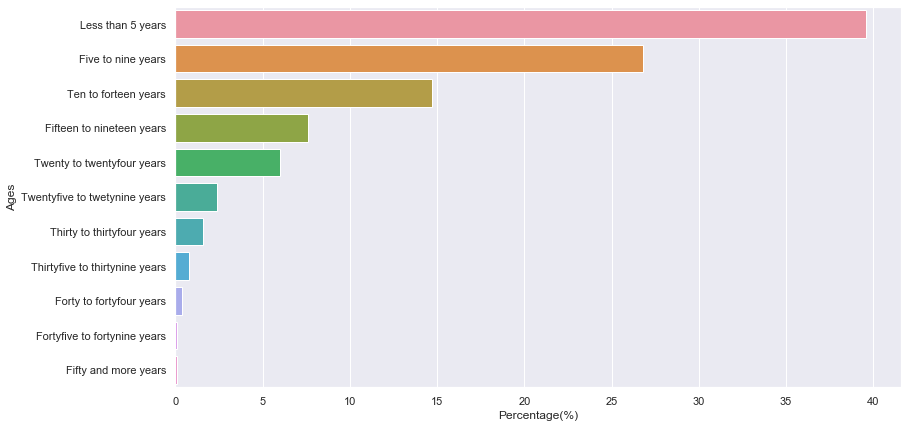

In [42]:
sns.set(rc={'figure.figsize':(13,7)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Ages', data=df_experience)  # plot the bars

In [43]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Experience.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Most popular Programming, Scripting and Markup languages

In [44]:
programming_language_df = data_set['LanguageWorkedWith']

In [45]:
# check for null enteries
any(programming_language_df.isnull())

True

In [46]:
# Remove null values from countries
programming_language_df = programming_language_df.dropna(how='any',axis=0) 

In [47]:
all_languages = [language for ls in programming_language_df for language in ls.split(';')]  # all languages with duplicates

import collections
prog_lang_occurances = collections.Counter(all_languages)  # Count occurances of each developer type

total  = len(programming_language_df)

programming_languages_names = prog_lang_occurances.keys()  # list of all programming languages names
programming_languages_count = prog_lang_occurances.values()  # list of all programming languages count
programming_languages_per = [round((value/total)*100, 1) for value in prog_lang_occurances.values()]  # list of all programming languages per

In [48]:
# Make data frame
df_pro_lan = pd.DataFrame(data=list(zip(programming_languages_names, programming_languages_count, programming_languages_per)), 
                           index=range(0, len(programming_languages_names)), columns=['Programming-Languages', 'Count', 'Percentage(%)'])

In [49]:
# sort the dataframe in decending order
df_pro_lan.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [50]:
df_pro_lan.head()

,Programming-Languages,Count,Percentage(%)
2,JavaScript,38822,67.7
1,HTML/CSS,36181,63.1
7,SQL,31413,54.7
5,Python,25287,44.1
8,Java,23074,40.2


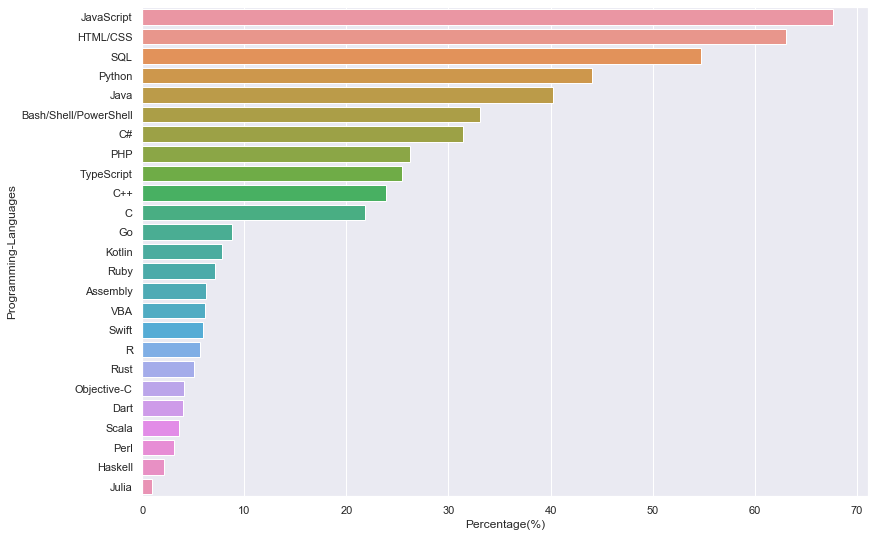

In [51]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Programming-Languages', data=df_pro_lan)  # plot the bars

In [52]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Programming_languages.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Most popular Web Frameworks

In [53]:
web_frame_wordk = data_set['WebframeWorkedWith']

In [54]:
# check for null enteries
any(web_frame_wordk.isnull())

True

In [55]:
# Remove null values from countries
web_frame_wordk = web_frame_wordk.dropna(how='any',axis=0) 

In [56]:
all_web_frame_works = [frame for fr in web_frame_wordk for frame in fr.split(';')]  # all web frame works with duplicates

import collections
web_frame_work_occurances = collections.Counter(all_web_frame_works)  # Count occurances of each developer type

total  = len(web_frame_wordk)

web_framework_names = web_frame_work_occurances.keys()  # list of all web_frame_work names
web_framework_count = web_frame_work_occurances.values()  # list of all web_frame_work count
web_framework_per = [round((value/total)*100, 1) for value in web_frame_work_occurances.values()]  # list of all web_frame_work per

In [57]:
# Make data frame
df_web_framework = pd.DataFrame(data=list(zip(web_framework_names, web_framework_count, web_framework_per)), 
                           index=range(0, len(web_framework_per)), columns=['Web-FrameWorks', 'Count', 'Percentage(%)'])

In [58]:
# sort the dataframe in decending order
df_web_framework.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [59]:
df_web_framework.head()

,Web-FrameWorks,Count,Percentage(%)
4,jQuery,18316,43.3
8,React.js,15167,35.9
5,Angular,10617,25.1
0,ASP.NET,9258,21.9
12,Express,8961,21.2


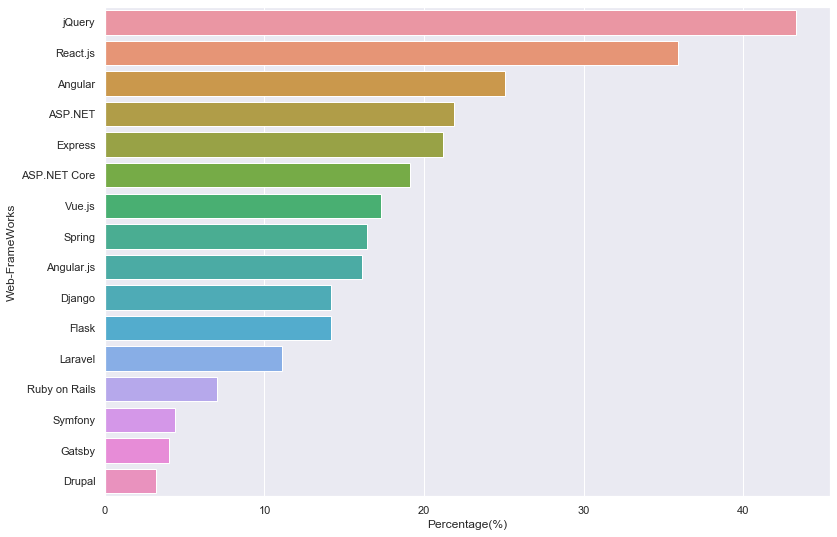

In [60]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Web-FrameWorks', data=df_web_framework)  # plot the bars

In [61]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Web_FrameWorks.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Most popular other FrameWorks, libraries and other tools

In [62]:
other_libraries = data_set['MiscTechWorkedWith']

In [63]:
# check for null enteries
any(other_libraries.isnull())

True

In [64]:
# Remove null values from countries
other_libraries = other_libraries.dropna(how='any',axis=0) 

In [65]:
all_tools = [language for ls in other_libraries for language in ls.split(';')]  # all tools with duplicates

import collections
tools_occurances = collections.Counter(all_tools)  # Count occurances of each developer type

total  = len(other_libraries)

other_tools_names = tools_occurances.keys()  # list of allother_tools names
other_tools_count = tools_occurances.values()  # list of all other_tools count
other_tools_per = [round((value/total)*100, 1) for value in tools_occurances.values()]  # list of all other_tools per

In [66]:
# Make data frame
df_other_tools = pd.DataFrame(data=list(zip(other_tools_names, other_tools_count, other_tools_per)), 
                           index=range(0, len(other_tools_per)), columns=['Other-Libraries', 'Count', 'Percentage(%)'])

In [67]:
# sort the dataframe in decending order
df_other_tools.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [68]:
df_other_tools.head()

,Other-Libraries,Count,Percentage(%)
5,Node.js,20741,51.4
0,.NET,14144,35.1
1,.NET Core,10755,26.7
4,Pandas,6253,15.5
7,TensorFlow,4652,11.5


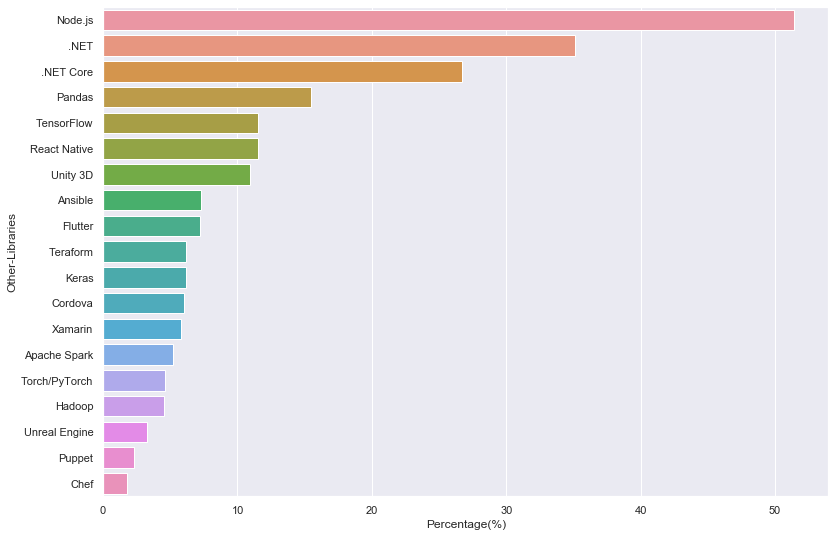

In [69]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Other-Libraries', data=df_other_tools)  # plot the bars

In [70]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Other_Tools.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Most Popular Collaboration tools

In [71]:
collab_tools = data_set['NEWCollabToolsWorkedWith']

In [72]:
# Check for null enteries
any(collab_tools.isnull())

True

In [73]:
# Remove null values from countries
collab_tools = collab_tools.dropna(how='any',axis=0) 

In [74]:
all_collabs = [language for ls in collab_tools for language in ls.split(';')]  # all tools with duplicates

import collections
collab_occurances = collections.Counter(all_collabs)  # Count occurances of each developer type

total  = len(collab_tools)

collab_tools_names = collab_occurances.keys()  # list of allother_tools names
collab_tools_count = collab_occurances.values()  # list of all other_tools count
collab_tools_per = [round((value/total)*100, 1) for value in collab_occurances.values()]  # list of all other_tools per

In [75]:
# Make data frame
df_collab_tools = pd.DataFrame(data=list(zip(collab_tools_names, collab_tools_count, collab_tools_per)), 
                           index=range(0, len(collab_tools_per)), columns=['Collaboration-tools', 'Count', 'Percentage(%)'])

In [76]:
# sort the dataframe in decending order
df_collab_tools.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [77]:
df_collab_tools.head()

,Collaboration-tools,Count,Percentage(%)
5,Github,43786,82.8
2,Slack,28018,53.0
1,Jira,25222,47.7
7,"Google Suite (Docs, Meet, etc)",21952,41.5
6,Gitlab,19545,37.0


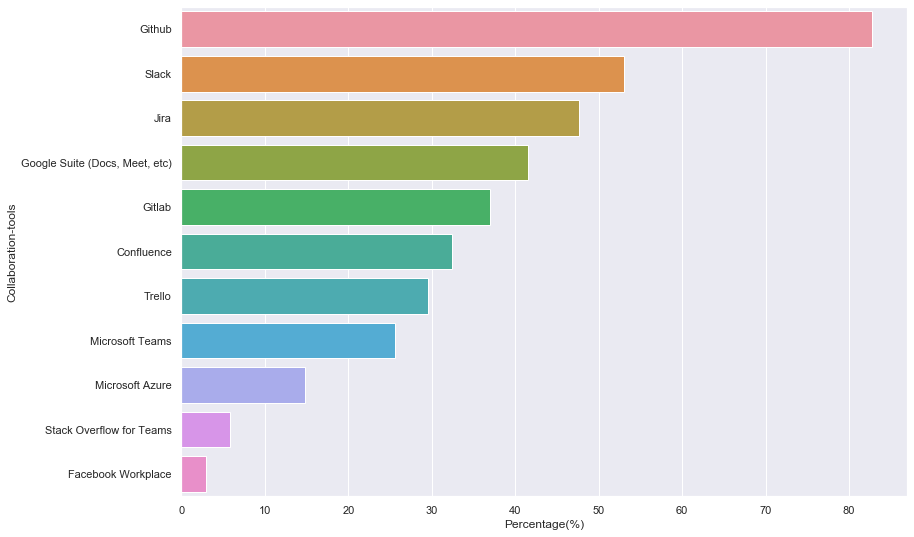

In [78]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Collaboration-tools', data=df_collab_tools)  # plot the bars

In [79]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Collaboration-Tools.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Most Popular Database

In [80]:
database = data_set['DatabaseWorkedWith']

In [81]:
# Check for null enteries
any(database.isnull())

True

In [82]:
# Remove null values from countries
database = database.dropna(how='any',axis=0) 

In [83]:
all_db = [language for db in database for language in db.split(';')]  # all database with duplicates

import collections
database_occurances = collections.Counter(all_db)  # Count occurances of each developer type

total  = len(database)

database_names = database_occurances.keys()  # list of database names
database_count = database_occurances.values()  # list of all database count
database_per = [round((value/total)*100, 1) for value in database_occurances.values()]  # list of all database per

In [84]:
# Make data frame
df_database = pd.DataFrame(data=list(zip(database_names, database_count, database_per)), 
                           index=range(0, len(database_per)), columns=['Database', 'Count', 'Percentage(%)'])

In [85]:
# sort the dataframe in decending order
df_database.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [86]:
df_database.head()

,Database,Count,Percentage(%)
3,MySQL,27559,55.6
4,PostgreSQL,17892,36.1
1,Microsoft SQL Server,16336,33.0
6,SQLite,15434,31.2
9,MongoDB,13086,26.4


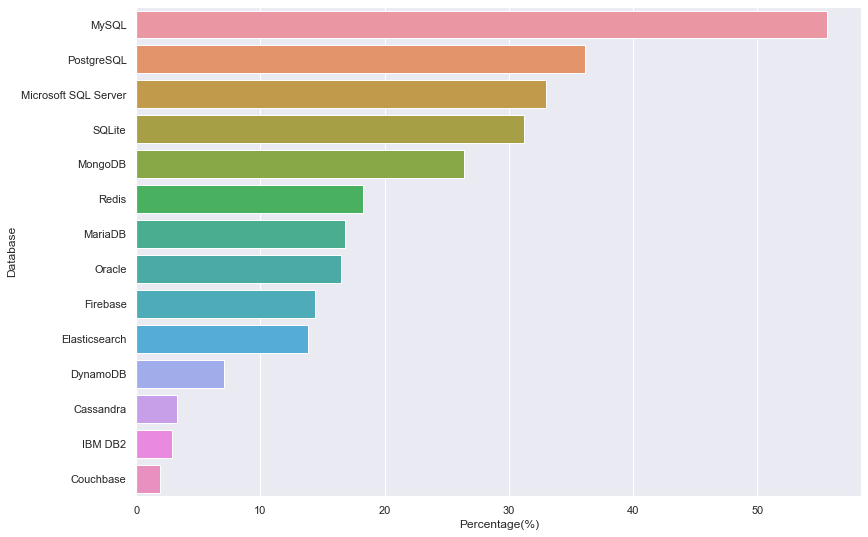

In [87]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Database', data=df_database)  # plot the bars

In [88]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Database.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Most Popular Platform

In [89]:
platform = data_set['PlatformWorkedWith']

In [90]:
# Check for null enteries
any(platform.isnull())

True

In [91]:
# Remove null values from countries
platform = platform.dropna(how='any',axis=0) 

In [92]:
all_platform = [language for pl in platform for language in pl.split(';')]  # all platform with duplicates

import collections
platform_occurances = collections.Counter(all_platform)  # Count occurances of each developer type

total  = len(platform)

platform_names = platform_occurances.keys()  # list of platforme names
platform_count = platform_occurances.values()  # list of all platform count
platform_per = [round((value/total)*100, 1) for value in platform_occurances.values()]  # list of all platform per

In [93]:
# Make data frame
df_platform = pd.DataFrame(data=list(zip(platform_names, platform_count, platform_per)), 
                           index=range(0, len(platform_per)), columns=['Platform', 'Count', 'Percentage(%)'])

In [94]:
# sort the dataframe in decending order
df_platform.sort_values(by=['Count'],
    axis=0,
    ascending=False,
    inplace=True)

In [95]:
df_platform.head()

,Platform,Count,Percentage(%)
4,Linux,29600,55.0
0,Windows,28595,53.1
3,Docker,18851,35.0
2,AWS,14389,26.7
6,Android,14101,26.2


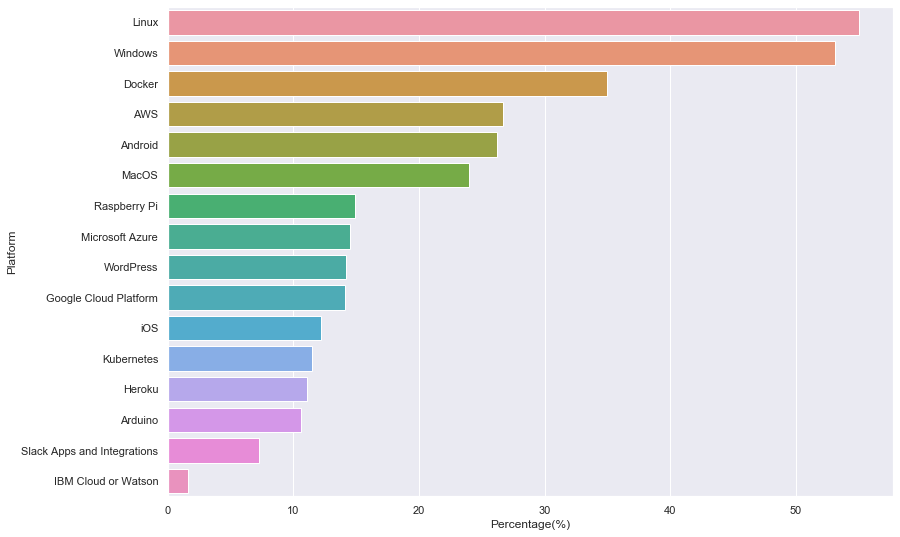

In [96]:
sns.set(rc={'figure.figsize':(13,9)})  # set figure size

plot = sns.barplot(x='Percentage(%)', y='Platform', data=df_platform)  # plot the bars

In [97]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Platform.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)

# Salary by Developer Type (Median)

In [98]:
salary = data_set.loc[:, ['DevType', 'ConvertedComp']]

In [99]:
# Check for null enteries
any(salary.isnull())

True

In [100]:
# Remove null values from countries
salary = salary.dropna(how='any',axis=0) 

In [101]:
import math

def roundup(x):  # for rounding up values to ceil thousand's
    return int(math.ceil(x / 1000.0)) * 1000

my_dict = dict()

for dev_types, sal in zip(salary['DevType'].values, salary['ConvertedComp'].values):
    for dev in dev_types.split(';'):
        if dev in my_dict:
            my_dict[dev].append(sal)
        else:
            my_dict[dev] = [sal]

for dev in my_dict:
    my_dict[dev] = roundup(np.median(my_dict[dev]))
    
dev_names = my_dict.keys()
dev_salary = my_dict.values()

In [102]:
# Make data frame
df_dev_salary = pd.DataFrame(data=list(zip(dev_names, dev_salary)), 
                           index=range(0, len(dev_salary)), columns=['Developer-Type', 'Salary'])

In [103]:
# sort the dataframe in decending order
df_dev_salary.sort_values(by=['Salary'],
    axis=0,
    ascending=False,
    inplace=True)

In [104]:
df_dev_salary.head()

,Developer-Type,Salary
14,Engineering manager,92000
19,Senior executive/VP,90000
21,"Engineer, site reliability",80000
10,DevOps specialist,69000
16,"Engineer, data",65000


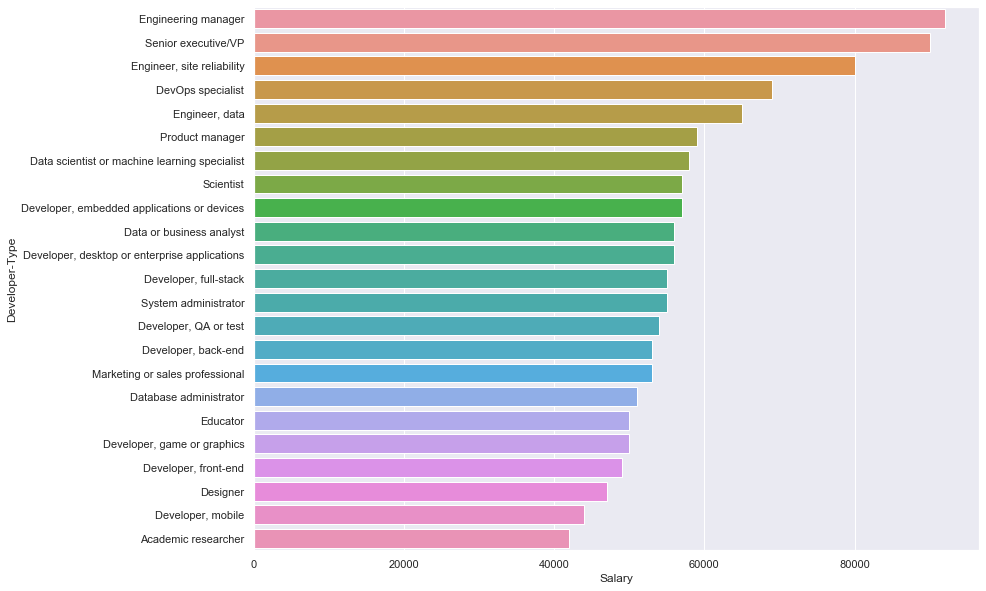

In [105]:
sns.set(rc={'figure.figsize':(13,10)})  # set figure size

plot = sns.barplot(x='Salary', y='Developer-Type', data=df_dev_salary)  # plot the bars

In [106]:
# save figure
fig = plot.get_figure()  # get figure
fig.savefig("Developer-Salary.png", bbox_inches="tight")  # save figure  ( bbox_inches="tight"   fits the image properly)